In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
filename = ("housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(filename, delim_whitespace=True, names=names)
prices = dataset['MEDV']
dataset = dataset.drop(['CRIM','ZN','INDUS','NOX','AGE','DIS','RAD', 'CHAS','PTRATIO','TAX','B'], axis = 1)
features = dataset.drop('MEDV', axis = 1)
dataset.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [2]:
x1 = features['RM'].values
x2 = features['LSTAT'].values
Y= prices.values


In [3]:
m = len(x1)
x0 = np.ones(m)
#we assume x0 to be 1 
X = np.array([x0, x1, x2]).T
#.T is used to obtain transpose 
# Initial Coefficients of B is assumed to be 0 
#our eqn will be in form of b0 + b1*x1 +b2*x2
B = np.zeros(3)
Y = np.array(Y)
alpha = 0.00012
#alpha is learning rate

In [4]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [5]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)


296.0734584980237


In [6]:
def grad_desc(X, Y, B, a, iteration):
    cost_iter = [0] * iteration
    #is used to obtain a plot of how gradient descent works 
    m = len(Y)
    
    for i in range(iteration):
        # value obtained from hypothesis
        h = X.dot(B)
        # Difference between Hypothesis and Actual Y
        #note that loss is calculate for all values so we divide it by m to obtain average loss
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - a * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_iter[i] = cost
        
    return B, cost_iter

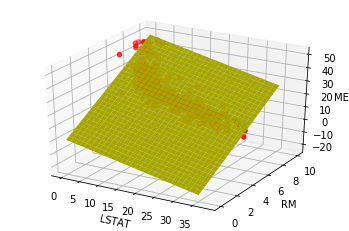

<Figure size 36000x28800 with 0 Axes>

In [7]:
newB, cost_history = grad_desc(X, Y, B, alpha, 3000)
Ypred=X.dot(newB)
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(0,35,30)
y = np.linspace(0,10,30)
e,r = np.meshgrid(x,y)
Z=newB[0]+newB[1]*r + newB[2]*e
threedee = plt.figure().gca(projection='3d')
threedee.scatter(dataset['LSTAT'],dataset['RM'],dataset['MEDV'], color='r')
threedee.plot_surface(e, r, Z, color='y')
threedee.set_xlabel('LSTAT')
threedee.set_ylabel('RM')
threedee.set_zlabel('MEDV')
plt.figure(figsize=(500,400)) 
plt.show()

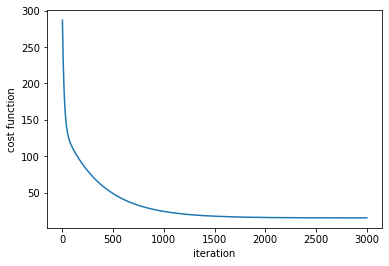

In [8]:
x=np.arange(1,3001)
plt.plot(x, cost_history)
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.show()

In [9]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse
print(rmse(Y,Ypred))

5.534374103282188
